## Futures

#### CSI500 : http://www.csindex.com.cn/en/indices/index-detail/000905
#### 價差 : http://a0.pise.pw/KZ3PX

In [1]:
# import packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pylab import date2num
from datetime import datetime, timedelta
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [69]:
# import data
dir_data = 'C:\\Users\\user\\Desktop\\MultiChart\\中證500股指期貨'
Data_Path = os.path.join(dir_data, 'CFFEX.IC HOT.txt')
CSI500 = pd.read_csv(Data_Path, engine='python')
CSI500.dropna(how='any',inplace=True)
CSI500.Date = pd.to_datetime(CSI500.Date)
CSI500['Date_Time'] = pd.to_datetime(CSI500['Date'].map(lambda x: str(x)) + ' ' + CSI500['Time'])
# Create Year & month & Return
CSI500['Year'] = CSI500['Date'].map(lambda x: x.year)
CSI500['Month'] = CSI500['Date'].map(lambda x: x.month)
CSI500['Week_day'] = CSI500['Date'].map(lambda x: x.weekday() + 1)
CSI500['Range'] = CSI500['High'] - CSI500['Low']
CSI500['Diff'] = CSI500['Close'] - CSI500['Open']
CSI500['Rotate'] = abs(CSI500['Diff']) / CSI500['Range']
CSI500['Up_down'] = CSI500['Diff'].map(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
CSI500['Return'] = ((CSI500['Close'] - CSI500['Open']) / CSI500['Open'])*100
CSI500['P_Return'] = ((CSI500['High'] - CSI500['Low']) / CSI500['Low'])*100
# Sort CSI500 by Date
CSI500 = CSI500.sort_values(by = ['Date_Time'])
Year_sorted = np.sort(CSI500.Year.unique())
CSI500.head()

,Date,Time,Open,High,Low,Close,TotalVolume,Date_Time,Year,Month,Week_day,Range,Diff,Rotate,Up_down,Return,P_Return
0,2015-04-17,09:14:00,7722.0,7722.0,7722.0,7722.0,28,2015-04-17 09:14:00,2015,4,5,0.0,0.0,NaN,0,0.000000,0.000000
1,2015-04-17,09:15:00,7712.0,7727.6,7708.4,7708.4,608,2015-04-17 09:15:00,2015,4,5,19.2,-3.6,0.187500,-1,-0.046680,0.249079
2,2015-04-17,09:16:00,7722.0,7727.6,7708.4,7708.4,636,2015-04-17 09:16:00,2015,4,5,19.2,-13.6,0.708333,-1,-0.176120,0.249079
3,2015-04-17,09:17:00,7709.4,7709.4,7700.4,7700.4,466,2015-04-17 09:17:00,2015,4,5,9.0,-9.0,1.000000,-1,-0.116741,0.116877
4,2015-04-17,09:18:00,7700.0,7704.6,7699.2,7699.4,370,2015-04-17 09:18:00,2015,4,5,5.4,-0.6,0.111111,-1,-0.007792,0.070137


In [70]:
# Split time
time = CSI500['Time'].str.split(':', 2, expand = True)
CSI500['Hour'] = time[0].astype(int)
CSI500['Min'] = time[1].astype(int)
CSI500.head()

,Date,Time,Open,High,Low,Close,TotalVolume,Date_Time,Year,Month,Week_day,Range,Diff,Rotate,Up_down,Return,P_Return,Hour,Min
0,2015-04-17,09:14:00,7722.0,7722.0,7722.0,7722.0,28,2015-04-17 09:14:00,2015,4,5,0.0,0.0,NaN,0,0.000000,0.000000,9,14
1,2015-04-17,09:15:00,7712.0,7727.6,7708.4,7708.4,608,2015-04-17 09:15:00,2015,4,5,19.2,-3.6,0.187500,-1,-0.046680,0.249079,9,15
2,2015-04-17,09:16:00,7722.0,7727.6,7708.4,7708.4,636,2015-04-17 09:16:00,2015,4,5,19.2,-13.6,0.708333,-1,-0.176120,0.249079,9,16
3,2015-04-17,09:17:00,7709.4,7709.4,7700.4,7700.4,466,2015-04-17 09:17:00,2015,4,5,9.0,-9.0,1.000000,-1,-0.116741,0.116877,9,17
4,2015-04-17,09:18:00,7700.0,7704.6,7699.2,7699.4,370,2015-04-17 09:18:00,2015,4,5,5.4,-0.6,0.111111,-1,-0.007792,0.070137,9,18


In [7]:
# Calculate consecutive ups and downs
# ref:https://codereview.stackexchange.com/questions/138550/count-consecutive-ones-in-a-binary-list
def Go_up_num(Series):
    positive_list = []
    longest = 0
    current = 0
    for i in Series:
        if i == 1:
            current += 1
        else:
            longest = max(longest, current)
            positive_list.append(longest)
            current = 0
    return positive_list

def Go_down_num(Series):
    negative_list = []
    longest = 0
    current = 0
    for i in Series:
        if i == -1:
            current += 1
        else:
            longest = max(longest, current)
            negative_list.append(longest)
            current = 0
    return negative_list

In [78]:
#Split data (Train/ Test)
start_date = datetime.strptime('2016-01-01', '%Y-%m-%d')
end_date = datetime.strptime('2018-12-31', '%Y-%m-%d')
msk = (CSI500['Date'] <= end_date) & (CSI500['Date'] >= start_date)
CSI500_train = CSI500.loc[msk]
CSI500_test = CSI500.loc[~msk]

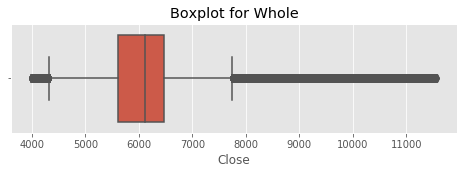

In [41]:
# Box plot for Whole
plt.figure(figsize=(8,2))    
sns.boxplot(CSI500.loc[:, 'Close'])
plt.title('Boxplot for Whole')
plt.show()

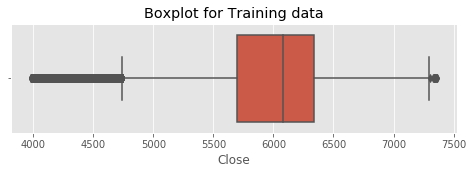

In [42]:
# Box plot for Training data
plt.figure(figsize=(8,2))    
sns.boxplot(CSI500_train.loc[:, 'Close'])
plt.title('Boxplot for Training data')
plt.show()

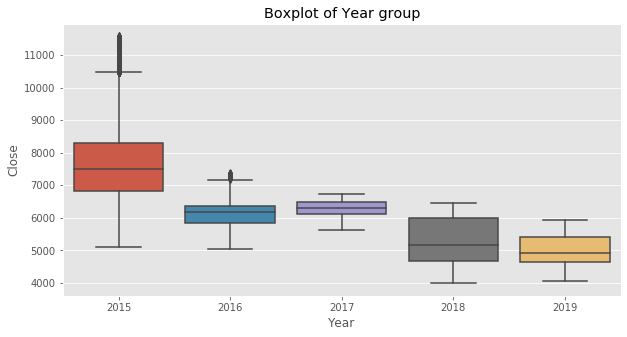

In [43]:
# Draw 6 Boxplots group by year
plt.figure(figsize=(10,5))
sns.boxplot(x='Year', y='Close', data=CSI500)
plt.title('Boxplot of Year group')
plt.show()

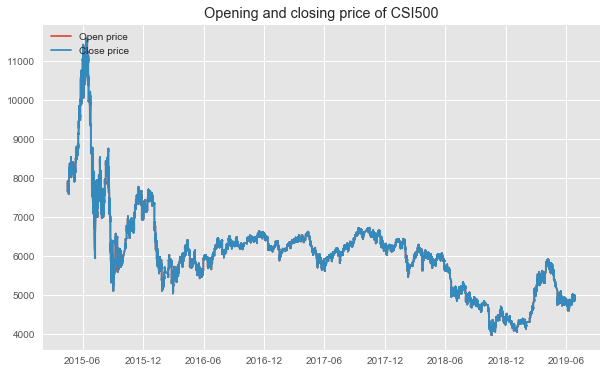

In [7]:
plt.figure(figsize=(10,6))
#plt.style.use('ggplot')
plt.title("Opening and closing price of CSI500")
plt.plot(CSI500['Date'], CSI500['Open'], label='Open price')
plt.plot(CSI500['Date'], CSI500['Close'], label='Close price')
plt.legend(loc='upper left')
plt.show()

Text(0.5, 1.0, 'CSI500 Return_rolling_var_Mink')

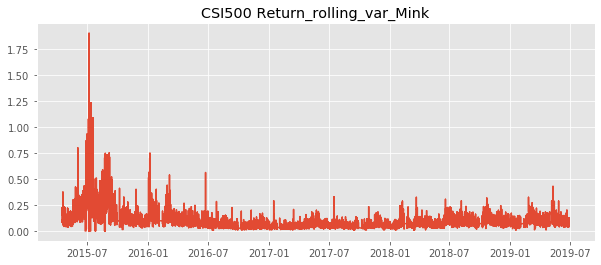

In [52]:
# Return 
plt.figure(figsize = (10,4))
plt.plot(CSI500.Date,CSI500['Return'].rolling(20).std())
plt.title('CSI500 Return_rolling_var_Mink')

Text(0.5, 1.0, 'CSI500 Return_rolling_var_Mink(Training)')

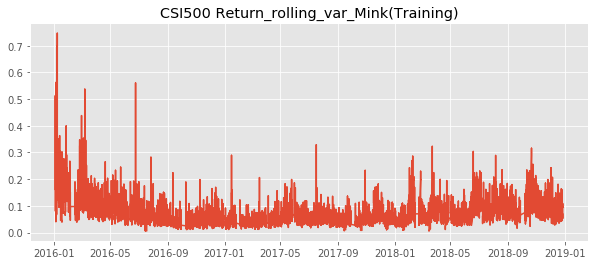

In [45]:
# Return 
plt.figure(figsize = (10,4))
plt.plot(CSI500_train.Date,CSI500_train['Return'].rolling(20).std())
plt.title('CSI500 Return_rolling_var_Mink(Training)')

Text(0.5, 1.0, 'CSI500 Return_rolling_var_Mink During Month')

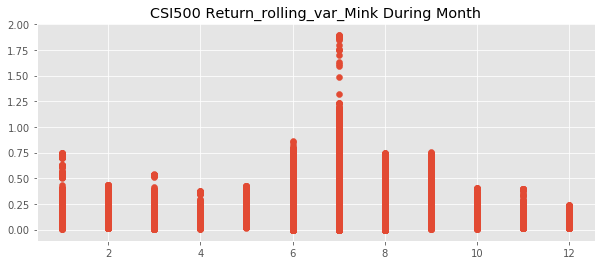

In [72]:
# Return (Month)
plt.figure(figsize = (10,4))
plt.scatter(CSI500.Month,CSI500['Return'].rolling(20).std())
plt.title('CSI500 Return_rolling_var_Mink During Month')

Text(0.5, 1.0, 'CSI500 Return_rolling_var_Mink During Month (Training)')

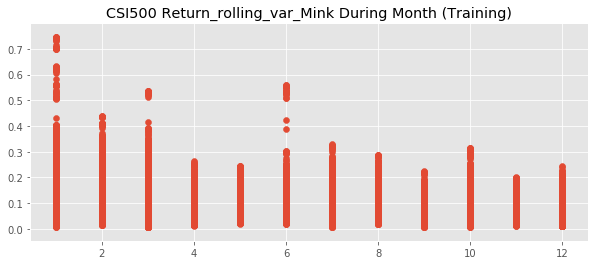

In [74]:
# Return (Month)
plt.figure(figsize = (10,4))
plt.scatter(CSI500_train.Month,CSI500_train['Return'].rolling(20).std())
plt.title('CSI500 Return_rolling_var_Mink During Month (Training)')

Text(0.5, 1.0, 'CSI500 Return_rolling_var_Mink During Week_Day')

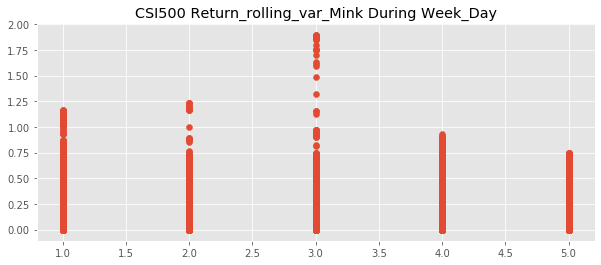

In [76]:
# Return (Week_Day)
plt.figure(figsize = (10,4))
plt.scatter(CSI500.Week_day,CSI500['Return'].rolling(20).std())
plt.title('CSI500 Return_rolling_var_Mink During Week_Day')

Text(0.5, 1.0, 'CSI500 Return_rolling_var_Mink During Week_Day (Training)')

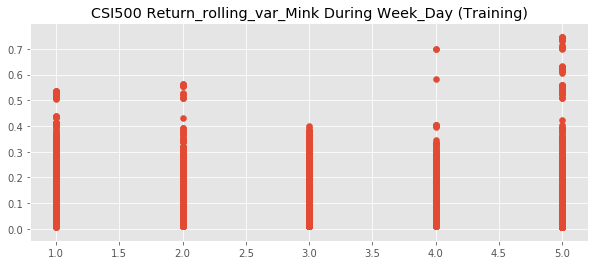

In [79]:
# Return (Week_Day)
plt.figure(figsize = (10,4))
plt.scatter(CSI500_train.Week_day,CSI500_train['Return'].rolling(20).std())
plt.title('CSI500 Return_rolling_var_Mink During Week_Day (Training)')

Text(0.5, 1.0, 'CSI500 Return_rolling_var_Mink During day')

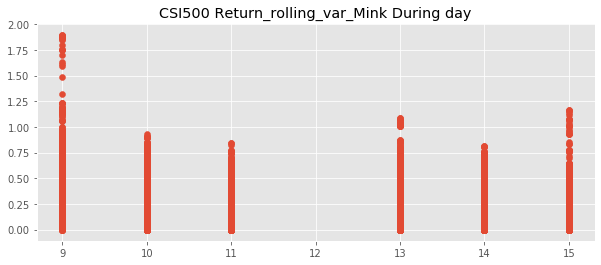

In [54]:
# Return (Hour)
plt.figure(figsize = (10,4))
plt.scatter(CSI500.Hour,CSI500['Return'].rolling(20).std())
plt.title('CSI500 Return_rolling_var_Mink During day')

Text(0.5, 1.0, 'CSI500 Return_rolling_var_Mink During day(training)')

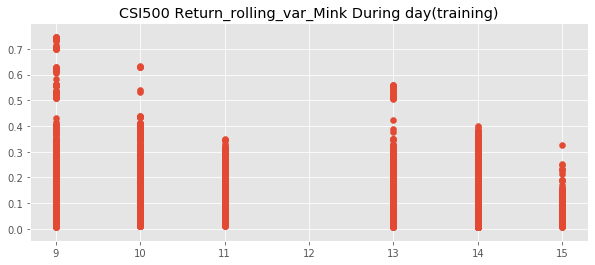

In [55]:
# Return (Hour)
plt.figure(figsize = (10,4))
plt.scatter(CSI500_train.Hour,CSI500_train['Return'].rolling(20).std())
plt.title('CSI500 Return_rolling_var_Mink During day(training)')

Text(0.5, 1.0, 'CSI500 P_Return_rolling_var_Mink')

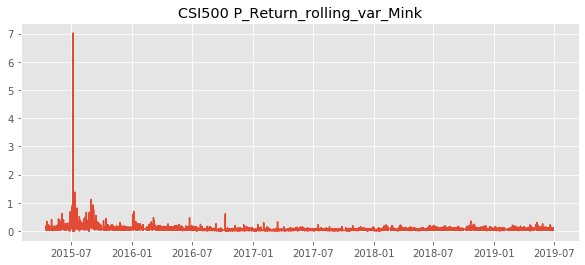

In [50]:
# Return 
plt.figure(figsize = (10,4))
plt.plot(CSI500.Date,CSI500['P_Return'].rolling(20).std())
plt.title('CSI500 P_Return_rolling_var_Mink')

Text(0.5, 1.0, 'CSI500 P_Return_rolling_var_Mink(training)')

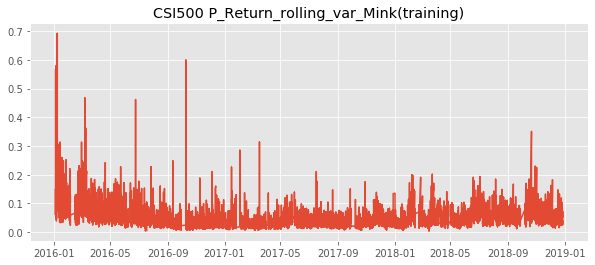

In [51]:
# Return 
plt.figure(figsize = (10,4))
plt.plot(CSI500_train.Date,CSI500_train['P_Return'].rolling(20).std())
plt.title('CSI500 P_Return_rolling_var_Mink(training)')

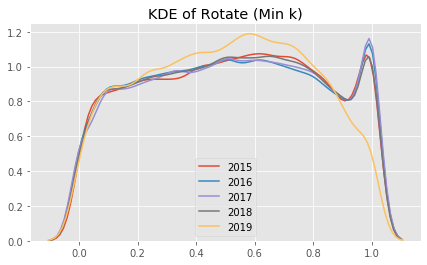

In [15]:
# Rotate
CSI500['Rotate'] = CSI500['Rotate'].replace([np.inf, -np.inf], np.nan)
CSI500['Rotate'].dropna(how='any',inplace=True)
# KDE of Rotate (Min k)
Year_sorted = np.sort(CSI500.Year.unique())
plt.figure(figsize=(7,4))
for i in range(len(Year_sorted)):
    sns.kdeplot(CSI500.loc[(CSI500['Year'] == Year_sorted[i]),'Rotate'],label = str(Year_sorted[i]),kernel='gau')
plt.title('KDE of Rotate (Min k)')
plt.legend()
plt.show()

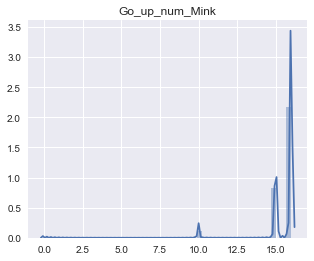

In [11]:
# 連續 K棒往上
sns.set(rc={'figure.figsize':(5,4)})
sns.distplot(Go_up_num(CSI500['Up_down'])).set_title("Go_up_num_Mink")

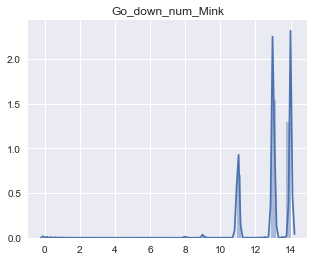

In [12]:
# 連續 K棒往下
sns.set(rc={'figure.figsize':(5,4)})
sns.distplot(Go_down_num(CSI500['Up_down'])).set_title("Go_down_num_Mink")

In [92]:
# from min k to 5 min k (Training)
stock = CSI500_train.set_index('Date_Time')
period_type = '5T'
period_stock_data = stock.resample(period_type,how='last')
period_stock_data['open_5t'] = stock['Open'].resample(period_type,how='first')
period_stock_data['close_5t'] = stock['Close'].resample(period_type,how='last')
period_stock_data['high_5t'] = stock['High'].resample(period_type,how='max')
period_stock_data['low_5t'] = stock['Low'].resample(period_type,how='min')
period_stock_data['volume_5t'] = stock['TotalVolume'].resample(period_type,how='sum')
period_stock_data['range_5t'] = period_stock_data['high_5t'] - period_stock_data['low_5t']
period_stock_data['diff_5t'] = period_stock_data['close_5t'] - period_stock_data['open_5t']
period_stock_data['rotate_5t'] = abs(period_stock_data['range_5t']) / period_stock_data['diff_5t']
period_stock_data['up_down_5t'] = period_stock_data['diff_5t'].map(lambda x: 1 if x >0 else -1)
period_stock_data['return_5t'] = ((period_stock_data['close_5t'] -  \
                                     period_stock_data['open_5t']) / period_stock_data['open_5t']) *100
period_stock_data['P_return_5t'] = ((period_stock_data['high_5t'] -  \
                                     period_stock_data['low_5t']) / period_stock_data['low_5t']) *100
period_stock_data.dropna(how='any',inplace=True)
period_stock_data.reset_index(inplace=True)
period_stock_data.head()

,Date_Time,Date,Time,Open,High,Low,Close,TotalVolume,Year,Month,...,close_5t,high_5t,low_5t,volume_5t,range_5t,diff_5t,rotate_5t,up_down_5t,return_5t,P_return_5t
0,2016-01-04 09:30:00,2016-01-04,09:34:00,7346.6,7349.4,7338.0,7338.0,66.0,2016.0,1.0,...,7338.0,7358.6,7321.2,501,37.4,-12.0,-3.116667,-1,-0.163265,0.510845
1,2016-01-04 09:35:00,2016-01-04,09:39:00,7334.2,7339.6,7327.6,7330.8,63.0,2016.0,1.0,...,7330.8,7364.8,7327.6,289,37.2,-13.2,-2.818182,-1,-0.179739,0.507670
2,2016-01-04 09:40:00,2016-01-04,09:44:00,7276.0,7288.8,7276.0,7287.4,58.0,2016.0,1.0,...,7287.4,7333.2,7257.8,434,75.4,-45.0,-1.675556,-1,-0.613714,1.038882
3,2016-01-04 09:45:00,2016-01-04,09:49:00,7254.0,7254.0,7239.0,7241.8,49.0,2016.0,1.0,...,7241.8,7287.2,7222.6,462,64.6,-43.2,-1.495370,-1,-0.592999,0.894415
4,2016-01-04 09:50:00,2016-01-04,09:54:00,7246.6,7258.6,7245.8,7258.6,47.0,2016.0,1.0,...,7258.6,7258.6,7231.8,218,26.8,16.8,1.595238,1,0.231987,0.370585


Text(0.5, 1.0, 'CSI500 Return_rolling_var_5Mink')

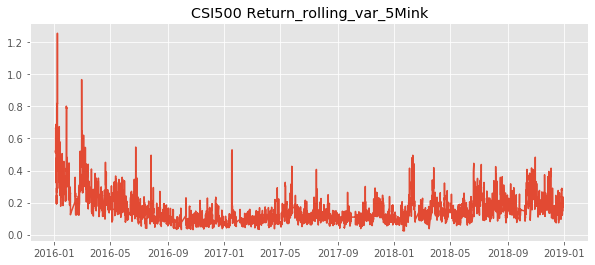

In [93]:
# Return 
plt.figure(figsize = (10,4))
plt.plot(period_stock_data['Date_Time'],period_stock_data['return_5t'].rolling(20).std())
plt.title('CSI500 Return_rolling_var_5Mink')

Text(0.5, 1.0, 'CSI500 P_Return_rolling_var_5Mink')

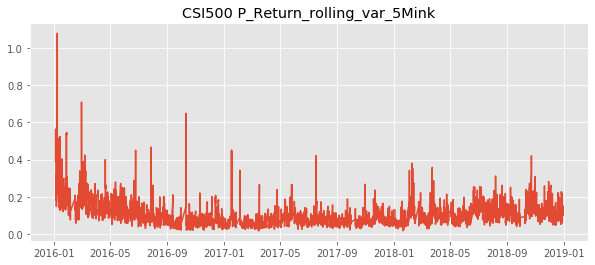

In [94]:
# Return 
plt.figure(figsize = (10,4))
plt.plot(period_stock_data['Date_Time'],period_stock_data['P_return_5t'].rolling(20).std())
plt.title('CSI500 P_Return_rolling_var_5Mink')

In [95]:
# from min k to 15 min k (Training)
stock = CSI500_train.set_index('Date_Time')
period_type = '15T'
period_stock_data = stock.resample(period_type,how='last')
period_stock_data['open_%s'%(period_type)] = stock['Open'].resample(period_type,how='first')
period_stock_data['close_%s'%(period_type)] = stock['Close'].resample(period_type,how='last')
period_stock_data['high_%s'%(period_type)] = stock['High'].resample(period_type,how='max')
period_stock_data['low_%s'%(period_type)] = stock['Low'].resample(period_type,how='min')
period_stock_data['volume_%s'%(period_type)] = stock['TotalVolume'].resample(period_type,how='sum')
period_stock_data['range_%s'%(period_type)] = period_stock_data['high_%s'%(period_type)] - period_stock_data['low_%s'%(period_type)]
period_stock_data['diff_%s'%(period_type)] = period_stock_data['close_%s'%(period_type)] - period_stock_data['open_%s'%(period_type)]
period_stock_data['rotate_%s'%(period_type)] = abs(period_stock_data['range_%s'%(period_type)]) / period_stock_data['diff_%s'%(period_type)]
period_stock_data['up_down_%s'%(period_type)] = period_stock_data['diff_%s'%(period_type)].map(lambda x: 1 if x >0 else -1)
period_stock_data['return_%s'%(period_type)] = ((period_stock_data['close_%s'%(period_type)] -  \
                                     period_stock_data['open_%s'%(period_type)]) / period_stock_data['open_%s'%(period_type)]) *100
period_stock_data['P_return_%s'%(period_type)] = ((period_stock_data['high_%s'%(period_type)] -  \
                                     period_stock_data['low_%s'%(period_type)]) / period_stock_data['low_%s'%(period_type)]) *100
period_stock_data.dropna(how='any',inplace=True)
period_stock_data.reset_index(inplace=True)
period_stock_data.head()

,Date_Time,Date,Time,Open,High,Low,Close,TotalVolume,Year,Month,...,close_15T,high_15T,low_15T,volume_15T,range_15T,diff_15T,rotate_15T,up_down_15T,return_15T,P_return_15T
0,2016-01-04 09:30:00,2016-01-04,09:44:00,7276.0,7288.8,7276.0,7287.4,58.0,2016.0,1.0,...,7287.4,7364.8,7257.8,1224,107.0,-62.6,-1.709265,-1,-0.851701,1.474276
1,2016-01-04 09:45:00,2016-01-04,09:59:00,7256.0,7265.2,7253.8,7260.0,35.0,2016.0,1.0,...,7260.0,7287.2,7222.6,881,64.6,-25.0,-2.584000,-1,-0.343171,0.894415
2,2016-01-04 10:00:00,2016-01-04,10:14:00,7063.2,7063.2,7029.2,7029.2,88.0,2016.0,1.0,...,7029.2,7258.0,7029.2,1244,228.8,-228.8,-1.000000,-1,-3.152384,3.254993
3,2016-01-04 10:15:00,2016-01-04,10:29:00,7050.0,7058.0,7050.0,7057.8,34.0,2016.0,1.0,...,7057.8,7070.2,7029.2,677,41.0,28.6,1.433566,1,0.406874,0.583281
4,2016-01-04 10:30:00,2016-01-04,10:44:00,7067.0,7078.2,7066.2,7069.2,15.0,2016.0,1.0,...,7069.2,7117.0,7035.0,624,82.0,11.2,7.321429,1,0.158685,1.165601


Text(0.5, 1.0, 'CSI500 Return_rolling_var_15Mink')

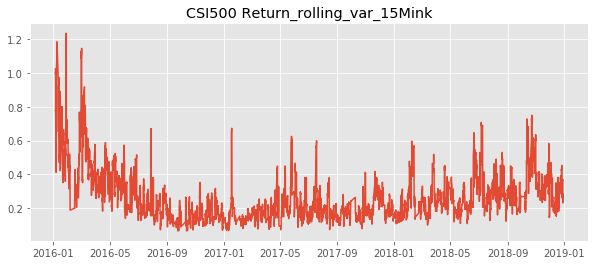

In [96]:
# Return 
plt.figure(figsize = (10,4))
plt.plot(period_stock_data['Date_Time'],period_stock_data['return_15T'].rolling(20).std())
plt.title('CSI500 Return_rolling_var_15Mink')

Text(0.5, 1.0, 'CSI500 P_Return_rolling_var_15Mink')

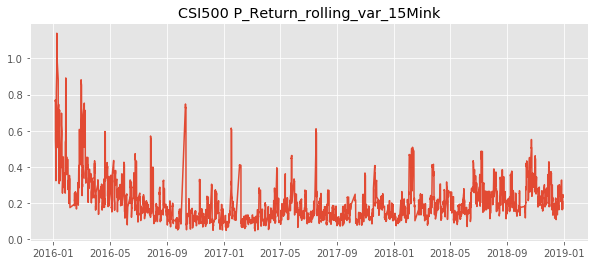

In [97]:
# Return 
plt.figure(figsize = (10,4))
plt.plot(period_stock_data['Date_Time'],period_stock_data['P_return_15T'].rolling(20).std())
plt.title('CSI500 P_Return_rolling_var_15Mink')

In [98]:
# from min k to 30 min k (Training)
stock = CSI500_train.set_index('Date_Time')
period_type = '30T'
period_stock_data = stock.resample(period_type,how='last')
period_stock_data['open_%s'%(period_type)] = stock['Open'].resample(period_type,how='first')
period_stock_data['close_%s'%(period_type)] = stock['Close'].resample(period_type,how='last')
period_stock_data['high_%s'%(period_type)] = stock['High'].resample(period_type,how='max')
period_stock_data['low_%s'%(period_type)] = stock['Low'].resample(period_type,how='min')
period_stock_data['volume_%s'%(period_type)] = stock['TotalVolume'].resample(period_type,how='sum')
period_stock_data['range_%s'%(period_type)] = period_stock_data['high_%s'%(period_type)] - period_stock_data['low_%s'%(period_type)]
period_stock_data['diff_%s'%(period_type)] = period_stock_data['close_%s'%(period_type)] - period_stock_data['open_%s'%(period_type)]
period_stock_data['rotate_%s'%(period_type)] = abs(period_stock_data['range_%s'%(period_type)]) / period_stock_data['diff_%s'%(period_type)]
period_stock_data['up_down_%s'%(period_type)] = period_stock_data['diff_%s'%(period_type)].map(lambda x: 1 if x >0 else -1)
period_stock_data['return_%s'%(period_type)] = ((period_stock_data['close_%s'%(period_type)] -  \
                                     period_stock_data['open_%s'%(period_type)]) / period_stock_data['open_%s'%(period_type)]) *100
period_stock_data['P_return_%s'%(period_type)] = ((period_stock_data['high_%s'%(period_type)] -  \
                                     period_stock_data['low_%s'%(period_type)]) / period_stock_data['low_%s'%(period_type)]) *100
period_stock_data.dropna(how='any',inplace=True)
period_stock_data.reset_index(inplace=True)
period_stock_data.head()

,Date_Time,Date,Time,Open,High,Low,Close,TotalVolume,Year,Month,...,close_30T,high_30T,low_30T,volume_30T,range_30T,diff_30T,rotate_30T,up_down_30T,return_30T,P_return_30T
0,2016-01-04 09:30:00,2016-01-04,09:59:00,7256.0,7265.2,7253.8,7260.0,35.0,2016.0,1.0,...,7260.0,7364.8,7222.6,2105,142.2,-90.0,-1.580000,-1,-1.224490,1.968820
1,2016-01-04 10:00:00,2016-01-04,10:29:00,7050.0,7058.0,7050.0,7057.8,34.0,2016.0,1.0,...,7057.8,7258.0,7029.2,1921,228.8,-200.2,-1.142857,-1,-2.758336,3.254993
2,2016-01-04 10:30:00,2016-01-04,10:59:00,7077.4,7078.0,7071.2,7075.0,14.0,2016.0,1.0,...,7075.0,7117.0,7035.0,897,82.0,17.0,4.823529,1,0.240861,1.165601
3,2016-01-04 11:00:00,2016-01-04,11:29:00,7029.8,7030.0,7029.6,7029.6,12.0,2016.0,1.0,...,7029.6,7084.2,7029.2,742,55.0,-48.4,-1.136364,-1,-0.683809,0.782450
4,2016-01-04 11:30:00,2016-01-04,11:30:00,7029.6,7031.2,7029.2,7029.2,19.0,2016.0,1.0,...,7029.2,7031.2,7029.2,19,2.0,-0.4,-5.000000,-1,-0.005690,0.028453


Text(0.5, 1.0, 'CSI500 Return_rolling_var_30Mink')

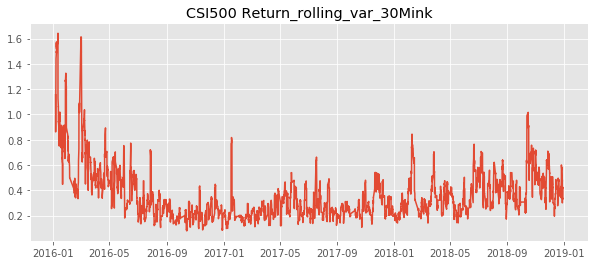

In [99]:
# Return 
plt.figure(figsize = (10,4))
plt.plot(period_stock_data['Date_Time'],period_stock_data['return_30T'].rolling(20).std())
plt.title('CSI500 Return_rolling_var_30Mink')

Text(0.5, 1.0, 'CSI500 P_Return_rolling_var_30Mink')

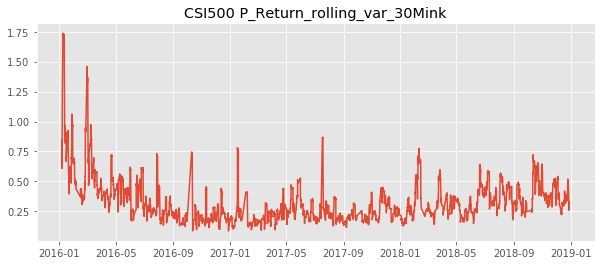

In [100]:
# Return 
plt.figure(figsize = (10,4))
plt.plot(period_stock_data['Date_Time'],period_stock_data['P_return_30T'].rolling(20).std())
plt.title('CSI500 P_Return_rolling_var_30Mink')

In [103]:
# from min k to 60 min k (Training)
stock = CSI500_train.set_index('Date_Time')
period_type = '1H'
period_stock_data = stock.resample(period_type,how='last')
period_stock_data['open_%s'%(period_type)] = stock['Open'].resample(period_type,how='first')
period_stock_data['close_%s'%(period_type)] = stock['Close'].resample(period_type,how='last')
period_stock_data['high_%s'%(period_type)] = stock['High'].resample(period_type,how='max')
period_stock_data['low_%s'%(period_type)] = stock['Low'].resample(period_type,how='min')
period_stock_data['volume_%s'%(period_type)] = stock['TotalVolume'].resample(period_type,how='sum')
period_stock_data['range_%s'%(period_type)] = period_stock_data['high_%s'%(period_type)] - period_stock_data['low_%s'%(period_type)]
period_stock_data['diff_%s'%(period_type)] = period_stock_data['close_%s'%(period_type)] - period_stock_data['open_%s'%(period_type)]
period_stock_data['rotate_%s'%(period_type)] = abs(period_stock_data['range_%s'%(period_type)]) / period_stock_data['diff_%s'%(period_type)]
period_stock_data['up_down_%s'%(period_type)] = period_stock_data['diff_%s'%(period_type)].map(lambda x: 1 if x >0 else -1)
period_stock_data['return_%s'%(period_type)] = ((period_stock_data['close_%s'%(period_type)] -  \
                                     period_stock_data['open_%s'%(period_type)]) / period_stock_data['open_%s'%(period_type)]) *100
period_stock_data['P_return_%s'%(period_type)] = ((period_stock_data['high_%s'%(period_type)] -  \
                                     period_stock_data['low_%s'%(period_type)]) / period_stock_data['low_%s'%(period_type)]) *100
period_stock_data.dropna(how='any',inplace=True)
period_stock_data.reset_index(inplace=True)
period_stock_data.head()

,Date_Time,Date,Time,Open,High,Low,Close,TotalVolume,Year,Month,...,close_1H,high_1H,low_1H,volume_1H,range_1H,diff_1H,rotate_1H,up_down_1H,return_1H,P_return_1H
0,2016-01-04 09:00:00,2016-01-04,09:59:00,7256.0,7265.2,7253.8,7260.0,35.0,2016.0,1.0,...,7260.0,7364.8,7222.6,2133,142.2,-90.0,-1.580000,-1,-1.224490,1.968820
1,2016-01-04 10:00:00,2016-01-04,10:59:00,7077.4,7078.0,7071.2,7075.0,14.0,2016.0,1.0,...,7075.0,7258.0,7029.2,2818,228.8,-183.0,-1.250273,-1,-2.521356,3.254993
2,2016-01-04 11:00:00,2016-01-04,11:30:00,7029.6,7031.2,7029.2,7029.2,19.0,2016.0,1.0,...,7029.2,7084.2,7029.2,761,55.0,-48.8,-1.127049,-1,-0.689460,0.782450
3,2016-01-04 13:00:00,2016-01-04,13:34:00,6881.2,6881.2,6881.2,6881.2,130.0,2016.0,1.0,...,6881.2,7029.2,6881.2,481,148.0,-148.0,-1.000000,-1,-2.105503,2.150788
4,2016-01-05 09:00:00,2016-01-05,09:59:00,6808.6,6815.0,6802.8,6806.0,47.0,2016.0,1.0,...,6806.0,6817.0,6650.0,4055,167.0,156.0,1.070513,1,2.345865,2.511278


Text(0.5, 1.0, 'CSI500 Return_rolling_var_60Mink')

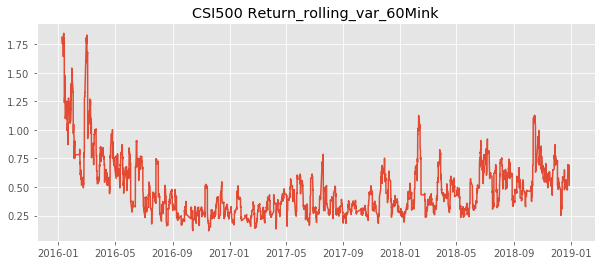

In [104]:
# Return 
plt.figure(figsize = (10,4))
plt.plot(period_stock_data['Date_Time'],period_stock_data['return_1H'].rolling(20).std())
plt.title('CSI500 Return_rolling_var_60Mink')

Text(0.5, 1.0, 'CSI500 P_Return_rolling_var_60Mink')

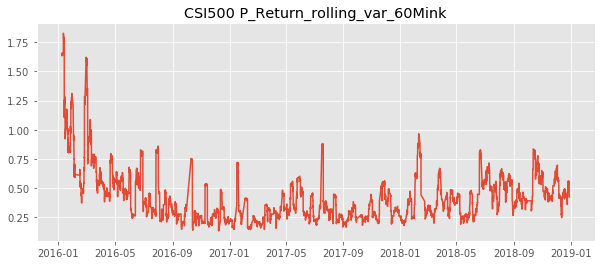

In [105]:
# Return 
plt.figure(figsize = (10,4))
plt.plot(period_stock_data['Date_Time'],period_stock_data['P_return_1H'].rolling(20).std())
plt.title('CSI500 P_Return_rolling_var_60Mink')

## Spot 

In [81]:
# import data
dir_data = 'C:\\Users\\user\\Desktop\\MultiChart\\中證500股指期貨'
Data_Path = os.path.join(dir_data, 'SSE.txt')
SSE = pd.read_csv(Data_Path, engine='python')
SSE.dropna(how='any',inplace=True)
SSE.Date = pd.to_datetime(SSE.Date)
SSE['Date_Time'] = pd.to_datetime(SSE['Date'].map(lambda x: str(x)) + ' ' + SSE['Time'])
# Create Year & month & Return
SSE['Year'] = SSE['Date'].map(lambda x: x.year)
SSE['Month'] = SSE['Date'].map(lambda x: x.month)
SSE['Week_day'] = SSE['Date'].map(lambda x: x.weekday() + 1)
SSE['Range'] = SSE['High'] - SSE['Low']
SSE['Diff'] = SSE['Close'] - SSE['Open']
SSE['Rotate'] = abs(SSE['Diff']) / SSE['Range']
SSE['Up_down'] = SSE['Diff'].map(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
SSE['Return'] = ((SSE['Close'] - SSE['Open']) / SSE['Open'])*100
SSE['P_Return'] = ((SSE['High'] - SSE['Low']) / SSE['Low'])*100
# Sort SSE by Date
SSE = SSE.sort_values(by = ['Date_Time'])
Year_sorted = np.sort(SSE.Year.unique())
SSE.head()

,Date,Time,Open,High,Low,Close,TotalVolume,Date_Time,Year,Month,Week_day,Range,Diff,Rotate,Up_down,Return,P_Return
0,2015-04-17,09:31:00,7979.35,8012.97,7979.35,8012.97,3583849,2015-04-17 09:31:00,2015,4,5,33.62,33.62,1.000000,1,0.421338,0.421338
1,2015-04-17,09:32:00,8014.90,8023.69,8014.90,8023.67,1808228,2015-04-17 09:32:00,2015,4,5,8.79,8.77,0.997725,1,0.109421,0.109671
2,2015-04-17,09:33:00,8023.75,8023.75,8014.48,8014.92,2022359,2015-04-17 09:33:00,2015,4,5,9.27,-8.83,0.952535,-1,-0.110048,0.115666
3,2015-04-17,09:34:00,8013.18,8013.18,8001.08,8001.08,1860753,2015-04-17 09:34:00,2015,4,5,12.10,-12.10,1.000000,-1,-0.151001,0.151230
4,2015-04-17,09:35:00,8001.17,8001.17,7996.26,7996.26,1495177,2015-04-17 09:35:00,2015,4,5,4.91,-4.91,1.000000,-1,-0.061366,0.061404


In [82]:
# Split time
time = SSE['Time'].str.split(':', 2, expand = True)
SSE['Hour'] = time[0].astype(int)
SSE['Min'] = time[1].astype(int)
SSE.head()

,Date,Time,Open,High,Low,Close,TotalVolume,Date_Time,Year,Month,Week_day,Range,Diff,Rotate,Up_down,Return,P_Return,Hour,Min
0,2015-04-17,09:31:00,7979.35,8012.97,7979.35,8012.97,3583849,2015-04-17 09:31:00,2015,4,5,33.62,33.62,1.000000,1,0.421338,0.421338,9,31
1,2015-04-17,09:32:00,8014.90,8023.69,8014.90,8023.67,1808228,2015-04-17 09:32:00,2015,4,5,8.79,8.77,0.997725,1,0.109421,0.109671,9,32
2,2015-04-17,09:33:00,8023.75,8023.75,8014.48,8014.92,2022359,2015-04-17 09:33:00,2015,4,5,9.27,-8.83,0.952535,-1,-0.110048,0.115666,9,33
3,2015-04-17,09:34:00,8013.18,8013.18,8001.08,8001.08,1860753,2015-04-17 09:34:00,2015,4,5,12.10,-12.10,1.000000,-1,-0.151001,0.151230,9,34
4,2015-04-17,09:35:00,8001.17,8001.17,7996.26,7996.26,1495177,2015-04-17 09:35:00,2015,4,5,4.91,-4.91,1.000000,-1,-0.061366,0.061404,9,35


In [83]:
#Split data (Train/ Test)
start_date = datetime.strptime('2016-01-01', '%Y-%m-%d')
end_date = datetime.strptime('2018-12-31', '%Y-%m-%d')
msk = (SSE['Date'] <= end_date) & (SSE['Date'] >= start_date)
SSE_train = SSE.loc[msk]
SSE_test = SSE.loc[~msk]

## Join

In [89]:
# Join CSI500 and SSE
SSE_mini = SSE.loc[:,['Date_Time', 'Close']]
CSI500_SSE = CSI500.join(SSE_mini.set_index('Date_Time'),lsuffix='_CSI500', rsuffix='_SSE', on='Date_Time')
CSI500_SSE.head()

,Date,Time,Open,High,Low,Close_CSI500,TotalVolume,Date_Time,Year,Month,Week_day,Range,Diff,Rotate,Up_down,Return,P_Return,Hour,Min,Close_SSE
0,2015-04-17,09:14:00,7722.0,7722.0,7722.0,7722.0,28,2015-04-17 09:14:00,2015,4,5,0.0,0.0,NaN,0,0.000000,0.000000,9,14,NaN
1,2015-04-17,09:15:00,7712.0,7727.6,7708.4,7708.4,608,2015-04-17 09:15:00,2015,4,5,19.2,-3.6,0.187500,-1,-0.046680,0.249079,9,15,NaN
2,2015-04-17,09:16:00,7722.0,7727.6,7708.4,7708.4,636,2015-04-17 09:16:00,2015,4,5,19.2,-13.6,0.708333,-1,-0.176120,0.249079,9,16,NaN
3,2015-04-17,09:17:00,7709.4,7709.4,7700.4,7700.4,466,2015-04-17 09:17:00,2015,4,5,9.0,-9.0,1.000000,-1,-0.116741,0.116877,9,17,NaN
4,2015-04-17,09:18:00,7700.0,7704.6,7699.2,7699.4,370,2015-04-17 09:18:00,2015,4,5,5.4,-0.6,0.111111,-1,-0.007792,0.070137,9,18,NaN


In [123]:
# Price_Difference
def Price_Difference(s1, s2):
    pd = []
    for i, j in zip(s1, s2):
        if np.isnan(i) | np.isnan(j):
            pd.append(np.nan)
        else:
            pd.append(i - j)
    return pd
CSI500_SSE['Price_Difference'] = Price_Difference(CSI500_SSE['Close_CSI500'],CSI500_SSE['Close_SSE'])

In [127]:
# from min k to 5 min k 
stock = CSI500_SSE.set_index('Date_Time')
period_type = '5T'
period_stock_data = stock.resample(period_type,how='last')
period_stock_data['open_%s'%(period_type)] = stock['Open'].resample(period_type,how='first')
period_stock_data['close_%s'%(period_type)] = stock['Close_CSI500'].resample(period_type,how='last')
period_stock_data['high_%s'%(period_type)] = stock['High'].resample(period_type,how='max')
period_stock_data['low_%s'%(period_type)] = stock['Low'].resample(period_type,how='min')
period_stock_data['volume_%s'%(period_type)] = stock['TotalVolume'].resample(period_type,how='sum')
period_stock_data['price_dif_%s'%(period_type)] = stock['Price_Difference'].resample(period_type,how='sum')
period_stock_data['range_%s'%(period_type)] = period_stock_data['high_%s'%(period_type)] - period_stock_data['low_%s'%(period_type)]
period_stock_data['diff_%s'%(period_type)] = period_stock_data['close_%s'%(period_type)] - period_stock_data['open_%s'%(period_type)]
period_stock_data['rotate_%s'%(period_type)] = abs(period_stock_data['range_%s'%(period_type)]) / period_stock_data['diff_%s'%(period_type)]
period_stock_data['up_down_%s'%(period_type)] = period_stock_data['diff_%s'%(period_type)].map(lambda x: 1 if x > 0 else -1)
period_stock_data['return_%s'%(period_type)] = ((period_stock_data['close_%s'%(period_type)] -  \
                                     period_stock_data['open_%s'%(period_type)]) / period_stock_data['open_%s'%(period_type)]) *100
period_stock_data['P_return_%s'%(period_type)] = ((period_stock_data['high_%s'%(period_type)] -  \
                                     period_stock_data['low_%s'%(period_type)]) / period_stock_data['low_%s'%(period_type)]) *100
period_stock_data.dropna(how='any',inplace=True)
period_stock_data.reset_index(inplace=True)
period_stock_data.head()

,Date_Time,Date,Time,Open,High,Low,Close_CSI500,TotalVolume,Year,Month,...,high_5T,low_5T,volume_5T,price_dif_5T,range_5T,diff_5T,rotate_5T,up_down_5T,return_5T,P_return_5T
0,2015-04-17 09:30:00,2015-04-17,09:34:00,7675.6,7694.8,7672.8,7694.8,461.0,2015.0,4.0,...,7694.8,7656.0,1938,-1350.64,38.8,23.8,1.630252,1,0.310259,0.506792
1,2015-04-17 09:35:00,2015-04-17,09:39:00,7762.8,7779.6,7752.0,7752.0,800.0,2015.0,4.0,...,7779.6,7694.8,3777,-1335.94,84.8,57.2,1.482517,1,0.743359,1.102043
2,2015-04-17 09:40:00,2015-04-17,09:44:00,7730.4,7749.0,7730.2,7740.0,523.0,2015.0,4.0,...,7754.8,7730.2,2785,-1397.61,24.6,-12.6,-1.952381,-1,-0.162526,0.318232
3,2015-04-17 09:45:00,2015-04-17,09:49:00,7751.2,7780.4,7747.8,7774.6,753.0,2015.0,4.0,...,7780.4,7720.8,2520,-1292.64,59.6,33.4,1.784431,1,0.431458,0.771941
4,2015-04-17 09:50:00,2015-04-17,09:54:00,7850.0,7859.0,7840.0,7850.4,742.0,2015.0,4.0,...,7867.2,7769.6,5068,-942.71,97.6,75.8,1.287599,1,0.974970,1.256178


In [128]:
period_stock_data['price_dif_5T']

0       -1350.64
1       -1335.94
2       -1397.61
3       -1292.64
4        -942.71
          ...   
50658    -197.15
50659    -211.80
50660    -201.31
50661    -190.35
50662     -33.68
Name: price_dif_5T, Length: 50663, dtype: float64